In [1]:
# import základných knižníc
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils import np_utils
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
# načítanie údajov z datasetu, prostredníctvom knižnice pandas
dataset = pd.read_csv('wowbgs.csv')
dataset.head(5)

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps,NaN
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps,NaN
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,NaN,1.0,heal,NaN
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,NaN,1.0,heal,NaN
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,NaN,1.0,dps,NaN


In [3]:
dataset.groupby(['Code']).sum()
dataset.head()

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps,NaN
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps,NaN
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,NaN,1.0,heal,NaN
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,NaN,1.0,heal,NaN
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,NaN,1.0,dps,NaN


In [18]:
# nahradenie nedefinovaných hodnôt v stĺpci "Win" hodnotou 0
dataset["Win"].fillna(0, inplace=True)
# priradenie údajov do premennej "data", s ktorými bude pracovať neurónová sieť
data = dataset[['HK','D','Win','Code','Faction']]
# vytvorenie tímov zoskupením 10 hráčov prostredníctvom funkcie "groupby" cez parametre "Code" a "Faction"
data_A = data.groupby(['Code','Faction']).sum()
data_A = data_A.reset_index()
data_A = data_A[['HK','D','Win']]
data_A['Win'] = np.where(data_A['Win'] == 0, 0, 1)
data_A.tail()

,HK,D,Win
341,216,18,1
342,101,23,0
343,158,14,1
344,25,22,0
345,228,6,1


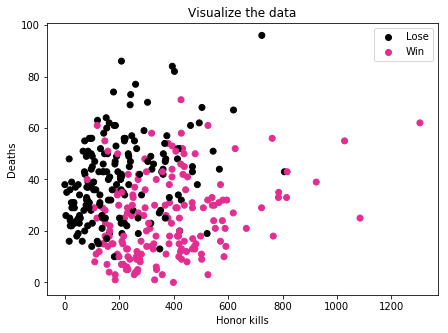

In [5]:
# Vizualizácia vstupných dát z datasetu po upravení. 
X = data_A.iloc[:,:2].values
y = data_A.iloc[:,2].values

y = np.where(y== 0.0,-1,1)
    
cm_bright = ListedColormap(['#000000', '#E32D91'])
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright)
plt.scatter(None, None, color = '#000000', label='Lose')
plt.scatter(None, None, color = '#E32D91', label='Win')
plt.legend()

plt.title('Visualize the data')
plt.xlabel('Honor kills')
plt.ylabel('Deaths')
plt.show()

In [6]:
# 1.KROK: Predspracovanie údajov na ich vloženie do neurónovej siete.
# rozdelenie údajov z datasetu na vstupné funkcie (X) a cieľové premenné (y)
X= data_A.iloc[:,:2]
y= data_A.iloc[:,2]

In [7]:
# rozdelenie X a y do trénovacieho súboru údajov a testovacieho súboru údajov
from sklearn.model_selection import train_test_split
# testovací súbor údajov predstavuje 30% celého súboru údajov
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
# 2. KROK: Vytvorenie neurónovej siete.
# vytvorenie neurónovej siete prostredníctvom knižnice KERAS
from keras import Sequential
# knižnica "Dense" sa používa na vytváranie vstupných, skrytých a výstupných vrstiev neurónovej siete
from keras.layers import Dense

In [9]:
# základná dátová štruktúra KERASU je model - spôsob organizácie vrstiev
# najjednoduchším typom modelu je Sequential model (sekvenčný model), reprezentujúci lineárny zväzok vrstiev
classifier = Sequential()

# dve vstupné funkcie a jedna cieľová premenná + 2 skryté vrstvy
# ReLu bude aktivačná funkcia pre skryté vrstvy
# Sigmoid bude aktivačná funkcia pre výstupnú vrstvu

# prvá skrytá vrstva, ktorá má 10 uzlov
classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal', input_dim=2))
# druhá skrytá vrstva, ktorá má 5 uzlov
classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal'))
# výstupná vrstva
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [10]:
# 3. KROK: Kompilácia neurónovej siete.
# optimalizácia NS prostredníctvom "Adam" 
# výpočet stratovej funkcie medzi skutočným výstupom a predpovedaným výstupom prostredníctvom mean_squared_error
# meranie výkonnosti modelu prostredníctvom metriky "accuracy"
classifier.compile(optimizer ='adam', loss='mean_squared_error', metrics =['accuracy'])

In [11]:
# 4. KROK: Prispôsobiť trénovacie údaje do vytvoreného modelu neurónovej siete na učenie.
# nastavenie batch_size na hodnotu 10 znamená, že sa používa 10 vzoriek na aktualizáciu gradientu
# nastavenie epochs=50, kde 1 epocha predstavuje iteráciu celého súboru údajov, pre naučenie modelu 
history = classifier.fit(X_train,y_train, batch_size=10, epochs=50, validation_data=[X_test,y_test])

Train on 242 samples, validate on 104 samples
Epoch 1/50
242/242 [==============================] - 0s 2ms/step - loss: 0.2408 - acc: 0.5455 - val_loss: 0.2301 - val_acc: 0.6346
Epoch 2/50
242/242 [==============================] - 0s 199us/step - loss: 0.2295 - acc: 0.6860 - val_loss: 0.2133 - val_acc: 0.7308
Epoch 3/50
242/242 [==============================] - 0s 194us/step - loss: 0.2154 - acc: 0.7521 - val_loss: 0.1926 - val_acc: 0.8462
Epoch 4/50
242/242 [==============================] - 0s 176us/step - loss: 0.1965 - acc: 0.7438 - val_loss: 0.1760 - val_acc: 0.8269
Epoch 5/50
242/242 [==============================] - 0s 247us/step - loss: 0.1751 - acc: 0.8017 - val_loss: 0.1546 - val_acc: 0.8269
Epoch 6/50
242/242 [==============================] - 0s 178us/step - loss: 0.1584 - acc: 0.7934 - val_loss: 0.1533 - val_acc: 0.7885
Epoch 7/50
242/242 [==============================] - 0s 191us/step - loss: 0.1573 - acc: 0.7810 - val_loss: 0.1347 - val_acc: 0.8365
Epoch 8/50
242/242

In [12]:
# 5. KROK: Vyhodnotenie modelu. 
# hodnotu strát a prenosti pre model v testovacom režime je možné zobraziť pomocou vyhodnocovacej funkcie "evaluate"
eval_model=classifier.evaluate(X_train, y_train)
eval_model

242/242 [==============================] - 0s 64us/step


[0.1385196472002455, 0.8016528935471842]

In [13]:
# Odhad výstupu pre súbor testovacích dát. Ak je odhad väčší ako 0,5 potom výstup je 1, ak nie výstup je 0.
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [14]:
# vytvorenie confusion matrix pre model na overenie presnosti
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[45  6]
 [11 42]]


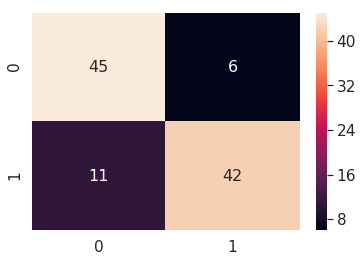

In [15]:
# grafické znázornenie confusion matrix prostredníctvom heatmapy
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[45,6],
        [11,42]]  

df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [16]:
# S danými vstupmi môžeme predpovedať s 82% presnosťou, že tím zložený z 10 hráčov vyhrá alebo prehrá.
print("\nAccuracy: %.2f%%" % (eval_model[1]*100))


Accuracy: 80.17%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


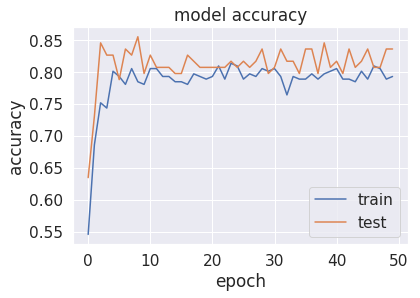

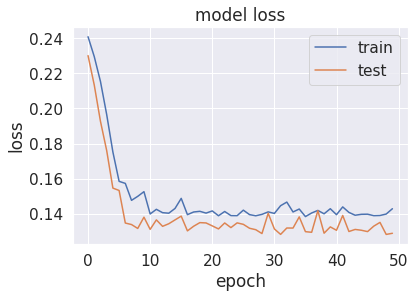

In [17]:
# 6. KROK: Grafické znázornenie dosiahnutých výsledkov.
print(history.history.keys())
# zhrnutie presnosti
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# zhrnutie strát
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()